In [ ]:
'''
# 统计相关模块stats
sp.stats.norm.rvs()#标准正态分布
sp.stats.norm.fit()#估算正态分布的参数
sp.stats.norm.pdf()#计算对应位置的概率密度
sp.state.norm.ppf()#找到标准正态分布中概率恰好为一半的点
sp.stats.expon()#指数分布
sp.stats.norm.cdf()#累积分布函数
sp.stats.norm.sf()#残存函数
sp.stats.norm.isf()#逆残存函数
sp.stats.t()#t分布
sp.stats.beta()#beta分布
sp.stats.gamma()#gamma分布
sp.stats.hypergeom()#超几何分布
sp.stats.lognorm()#对数正态分布
sp.stats.uniform()#均匀分布
sp.stats.chi2()#卡方分布
sp.stats.cauchy()#柯西分布
sp.stats.laplace()#拉普拉斯分布
sp.stats.rayleigh()#瑞利分布
sp.stats.randint()#离散均匀分布
sp.stats.f()#f分布
sp.stats.binom()#二项分布
sp.stats.poisson()#泊松分布
sp.stats.rv_continuous()#自定义连续分布
sp.stats.rv_discrete()#自定义离散分布
sp.stats.mode()#计算数据的众数
sp.stats.skew()#计算数据的偏度
sp.stats.kurtosis()#计算数据的峰度
sp.stats.ttest_rel()#配对样本t检验
sp.stats.ttest_ind()#独立样本t检验
sp.stats.ttest_1samp()#单样本t检验
'''

Mean Std (0.015500820876900322, 0.9902117524959321)
Skewtest pvalue SkewtestResult(statistic=0.31293717532854504, pvalue=0.7543283931856792)
Kurtosistest pvalue KurtosistestResult(statistic=-0.9639379581725415, pvalue=0.3350770318291736)
Normaltest pvalue NormaltestResult(statistic=1.0271060629084567, pvalue=0.5983657849853983)
95 percentile 1.6688883807707933
Percentile at 1 83.55555555555556


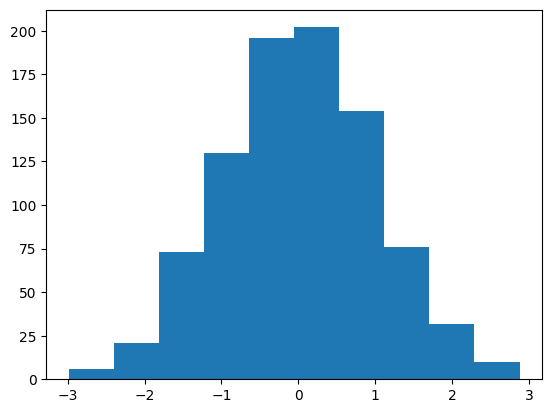

In [1]:
import matplotlib.pyplot as plt
# 导入包
from scipy import stats

# 1.使用`scipy.stats`包按正态分布生成随机数
generated = stats.norm.rvs(size=900)

# 2.用正态分布去拟合生成的数据，得到其均值和标准差
print("Mean", "Std", stats.norm.fit(generated))
# Mean Std (-0.027757190138192445, 0.9967355589828278)

# 3.偏度（skewness）描述的是概率分布的偏斜（非对称）程度。我们来做一个偏度检验。
# 该检验有两个返回值，其中第二个返回值为p-value，即观察到的数据集服从正态分布的概率，取值范围为0~1。
print("Skewtest", "pvalue", stats.skewtest(generated))
# Skewtest pvalue SkewtestResult(statistic=-0.4227102833216121, pvalue=0.6725066519280437)
# 因此，该数据集有67%的概率服从正态分布。

# 4.峰度（kurtosis）描述的是概率分布曲线的陡峭程度。我们来做一个峰度检验。该检验与
# 偏度检验类似，当然这里是针对峰度。
print("Kurtosistest", "pvalue", stats.kurtosistest(generated))
# Kurtosistest pvalue KurtosistestResult(statistic=0.6422156432448409, pvalue=0.5207331773445296)

# 5.正态性检验（normality test）可以检查数据集服从正态分布的程度。我们来做一个正态性
# 检验。该检验同样有两个返回值，其中第二个返回值为p-value。
print("Normaltest", "pvalue", stats.normaltest(generated))
# Normaltest pvalue NormaltestResult(statistic=0.5911249160542223, pvalue=0.7441129374456706)

# 6.使用SciPy我们可以很方便地得到数据所在的区段中某一百分比处的数值
print("95 percentile", stats.scoreatpercentile(generated, 95))  # 95 percentile 1.6419459784929902

# 7.将前一步反过来，我们也可以从数值1出发找到对应的百分比
print("Percentile at 1", stats.percentileofscore(generated, 1))  # Percentile at 1 84.44444444444444

# 8.使用Matplotlib绘制生成数据的分布直方图。
plt.hist(generated)
plt.show()

In [2]:
from scipy import stats
import numpy as np

np.random.seed(12345678)
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500)
rvs2 = stats.norm.rvs(loc=6, scale=10, size=500)
print(stats.ttest_ind(rvs1, rvs2))

# 两独立样本T检验
# 用于比较两组数据是否来自于同一正态分布的总体。
# 注意：如果要比较的两组数据不满足方差齐性， 需要在ttest_ind()函数中添加参数equal_var = False
# Ttest_indResult(statistic=-1.3022440006355478, pvalue=0.19313343989106407)

Ttest_indResult(statistic=-1.3022440006355476, pvalue=0.19313343989106413)


In [3]:
from scipy import stats
import numpy as np

np.random.seed(12345678)
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500)
rvs2 = (stats.norm.rvs(loc=5, scale=10, size=500) + stats.norm.rvs(scale=0.2, size=500))
print(stats.ttest_rel(rvs1, rvs2))
# 配对样本T检验可视为单样本T检验的扩展，检验的对象由一群来自正态分布独立样本更改为二群配对样本观测值之差。
# 它常用于比较同一受试对象处理的前后差异，或者按照某一条件进行两两配对分别给与不同处理的受试对象之间是否存在差异。
# 运行结果：Ttest_relResult(statistic=0.24101764965300979, pvalue=0.80964043445811551)

Ttest_relResult(statistic=0.24101764965300979, pvalue=0.8096404344581155)


In [4]:
from scipy import stats
import numpy as np

np.random.seed(12)
rvs = stats.norm.rvs(loc=5, scale=2, size=100)
# rvs2=list(rvs)
# data=pd.DataFrame(rvs2,columns=['数字'])
# data.to_excel('data.xlsx')
# scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided')
# 单样本T检验，用于检验数据是否来自一致均值的总体，T检验主要是以均值为核心的检验
# 这是对独立观测样本 a 的期望值(均值)等于给定总体均值 popmean 的零假设的检验。
print(stats.ttest_1samp(rvs, 5))
#TtestResult(statistic=-1.3727623683406578, pvalue=0.17292795979596837, df=99)

Ttest_1sampResult(statistic=-1.3727623683406578, pvalue=0.17292795979596837)


In [5]:
from scipy import stats
import numpy as np

np.random.seed(12345678)
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500)
rvs2 = stats.norm.rvs(loc=25, scale=9, size=500)
# stats.norm.rvs(loc=0,scale=1,size=n)，生成n个服从正态分布的随机数
# 其主要用法为(参数loc默认为零，scale默认为1，不用管它们，下从stats.norm.pdf略)
# stats.norm.pdf(x)，计算概率密度函数
# stats.norm.cdf(x)，计算累计密度函数
# stats.norm.ppf(q)，计算z值
# stats.norm.var()/stats.norm.std()/stats.norm.mean()/stats.norm.median()，计算分布的方差/标准差/均值/中位数
#差齐性检验用以检验两组或多组数据与其均值偏离程度是否存在差异，也是很多检验和算法的先决条件
print(stats.levene(rvs1, rvs2))

LeveneResult(statistic=1.69399631630608, pvalue=0.19337536323599344)


In [6]:
from scipy import stats
import numpy as np

np.random.seed(12345678)
x = stats.norm.rvs(loc=0, scale=1, size=300)
#科尔莫戈罗夫检验(Kolmogorov-Smirnov test)，检验样本数据是否服从某一分布，仅适用于连续分布的检验
print(stats.kstest(x, 'norm'))

KstestResult(statistic=0.0315638260778347, pvalue=0.9167271933349118)


In [7]:
## Import the packages
import numpy as np
from scipy import stats

## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b) / 2)

## Calculate the t-statistics
t = (a.mean() - b.mean()) / (s * np.sqrt(2 / N))

## Compare with the critical t-value
#Degrees of freedom
df = 2 * N - 2

#p-value after comparison with the t
p = 1 - stats.t.cdf(t, df=df)

print("t = " + str(t))
print("p = " + str(2 * p))
#Note that we multiply the p value by 2 because its a twp tail t-test
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.

## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a, b)
print("t = " + str(t2))
print("p = " + str(2 * p2))
# t分数是两个组之间的差值与组内差的比值。
# t分数越大，组间的差异越大。
# t分数越小，组间的相似度就越大。t分数为3代表这些组是彼此之间的三倍。
# t检验,比较两个平均值（均值），然后告诉你它们彼此是否有差异。并且，t检验还会告诉你这个差异有没有意义，换句话说，它让你知道这些差异是否可能是偶然发生的。

t = 4.233779280832134
p = 0.000499321142030329
t = 4.233779280832134
p = 0.0009986422840608002


In [8]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
from scipy import stats

iris = load_iris()
# print(iris)
data = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
# data.to_csv('iris.csv')
#计算样本均值、标准差
mean = data['petal_length'].mean()
std = data['petal_length'].std()
print('样本均值：', mean)
print('样本标准差：', std)
#计算t统计量
t = (mean - 3.5) / (std / np.sqrt(len(data['petal_length'])))
print('t统计量：', t)
#计算p值
#df：自由度，即变量可以自由取值的个数
p = 2 * stats.t.sf(abs(t), df=len(data['petal_length']) - 1)
print('P-Value值：', p)

样本均值： 3.7580000000000027
样本标准差： 1.7652982332594667
t统计量： 1.7899761687043467
P-Value值： 0.07548856490783468


In [9]:
import numpy as np
from scipy.stats import f

# 大数定律：随着样本量的增大，样本均值逐渐趋于总体均值。
# 中心极限定理：样本可能不是正态分布，但是样本均值都是呈正态分布。
# F分布
# 分析两个正态分布方差比值的分布情况，F分布是由两个独立的卡方分布的比值所得到的分布
# 检验两个样本方差是否相等。常被用于统计分析、财务分析、市场分析、医学研究等领域
# /* 案例
# 假设有两个班级，每个班级各有30名学生，两个班级的数学成绩分别为：
# 班级1：{70, 71, 68, 75, 72, 69, 74, 73, 71, 70, 75, 72, 69, 68, 72, 70, 71, 73, 72, 74, 73, 72, 70, 69, 71, 73, 75, 74, 73, 72, 75}
# 班级2：{71, 72, 69, 73, 74, 70, 68, 72, 75, 76, 74, 73, 72, 75, 73, 70, 69, 71, 70, 72, 73, 74, 73, 75, 72, 71, 70, 74, 73, 75, 73}
# 现在需要检验这两个班级的数学成绩方差是否相等。
class1 = [70, 71, 68, 75, 72, 69, 74, 73, 71, 70, 75, 72, 69, 68, 72, 70, 71, 73, 72, 74, 73, 72, 70, 69, 71, 73, 75,
          74, 73, 72, 75]
class2 = [71, 72, 69, 73, 74, 70, 68, 72, 75, 76, 74, 73, 72, 75, 73, 70, 69, 71, 70, 72, 73, 74, 73, 75, 72, 71, 70,
          74, 73, 75, 73]

s1 = np.var(class1, ddof=1)
s2 = np.var(class2, ddof=1)

print("s1: ", s1)
print("s2: ", s2)

F = s1 / s2
print("F值: ", F)

df1 = len(class1) - 1
df2 = len(class2) - 1
p_value = f.sf(F, df1, df2)

print("P值: ", p_value)

# s1:  4.361290322580645
# s2:  4.159139784946236
# F值:  1.0486039296794212
# P值:  0.44872262220538617

s1:  4.361290322580645
s2:  4.159139784946236
F值:  1.0486039296794212
P值:  0.4487226222053864


In [10]:
from numpy import array, sqrt
from scipy.stats import t

a = array([506, 508, 499, 503, 504, 510, 497, 512, 514, 505, 493, 496, 506, 502, 509, 496])
# numpy.std() 求标准差的时候默认是除以 n 的，即是有偏的，np.std无偏样本标准差方式为 ddof = 1；
# pandas.std() 默认是除以n-1 的，即是无偏的，如果想和numpy.std() 一样有偏，需要加上参数ddof=0 ，即pandas.std(ddof=0)
alpha = 0.05
n = len(a)
mu = a.mean()
s = a.std(ddof=1)  #计算均值和标准差
print(mu, s)
val = (mu - s / sqrt(n) * t.ppf(1 - alpha / 2, n - 1), mu + s / sqrt(n) * t.ppf(1 - alpha / 2, n - 1))
print("置信区间为：", val)

503.75 6.202150164795002
置信区间为： (500.44510746243924, 507.05489253756076)


In [11]:

import numpy as np


def confidence_interval_u(data, sigma=-1, alpha=0.05, side_both=True):
    xb = np.mean(data)
    s = np.std(data, ddof=1)
    if sigma > 0:  # sigma已知，枢轴量服从标准正态分布
        Z = stats.norm(loc=0, scale=1.)
        if side_both:  # 求双侧置信区间
            tmp = sigma / np.sqrt(len(data)) * Z.ppf(1 - alpha / 2)
            return (xb - tmp, xb + tmp)
        else:  # 单侧置信下限或单侧置信上限
            tmp = sigma / np.sqrt(len(data)) * Z.ppf(1 - alpha)
            return {'bottom_limit': xb - tmp, 'top_limit': xb + tmp}
    else:  # sigma未知，枢轴量服从自由度为n-1的t分布
        T = stats.t(df=len(data) - 1)
        if side_both:
            tmp = s / np.sqrt(len(data)) * T.ppf(1 - alpha / 2)
            return (xb - tmp, xb + tmp)
        else:
            tmp = s / np.sqrt(len(data)) * T.ppf(1 - alpha)
            return {'bottom_limit': xb - tmp, 'top_limit': xb + tmp}


data = np.array([101.3, 96.6, 100.4, 98.8, 94.6, 103.1, 102.3, 97.5, 105.4, 100.2])
confidence_interval_u(data, 3)

(98.16061490308631, 101.87938509691368)

In [12]:
import numpy as np
import scipy.stats as st

# data of goals scored by 20 footballers in a calendar year
fb_data = [10, 11, 10, 14, 16, 24, 10, 6, 8, 10,
           11, 27, 28, 21, 13, 10, 6, 7, 8, 10]
# 置信水平create 90% confidence interval
confidence_level = 0.90
# t.interval() 计算置信区间 （n<30）
print("置信区间为:", st.t.interval(confidence_level, df=len(fb_data) - 1,
                                   loc=np.mean(fb_data),
                                   scale=st.sem(fb_data)))
# 标准误用来衡量抽样误差，是统计推断可靠性的指标。
# scipy.stats.sem(a, axis=0, ddof=1, nan_policy='propagate')
# axis:默认为 0。如果没有，则计算整个数组a
# ddof:Delta 自由度。

置信区间为: (10.395704943723088, 15.60429505627691)


0.004345983897578176
1.0414206995887423


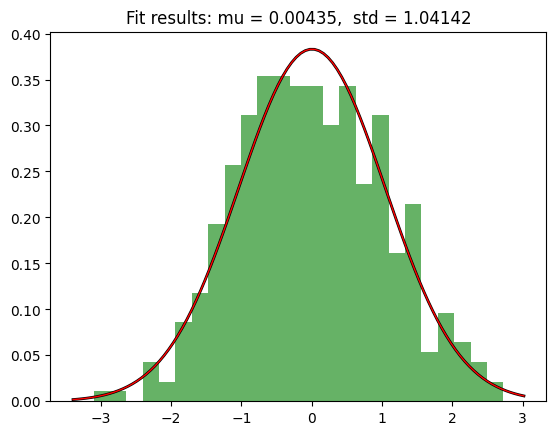

In [13]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

data = norm.rvs(loc=0, scale=1, size=400)
mu1 = np.mean(data)
std1 = np.std(data)
print(mu1)
print(std1)

mu, std = norm.fit(data)  #fit()函数来拟合数据
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()  #xlim获取当前x轴范围设定
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
q = norm.pdf(x, mu1, std1)
plt.plot(x, p, 'k', linewidth=2)  #绘制概率密度函数
plt.plot(x, q, 'r', linewidth=1)
title = "Fit results: mu = %.5f,  std = %.5f" % (mu, std)
plt.title(title)
plt.show()
# plt.plot(x,y,format_string,**kwargs)
# x表示二维坐标中X轴数据（列表或数据，可选）
# y表示二维坐标中Y轴数据（列表或数据）
# format_string表示控制曲线的格式字符串（线宽线型颜色等）可选
# **kwargs表示第二组或更多（x,y,format_string）

In [14]:
from scipy import stats
import pandas as pd

# scipy包是一个高级的科学计算库，它和Numpy联系很密切，Scipy一般都是操控Numpy数组来进行科学计算

data = [87, 77, 92, 68, 80, 78, 84, 77, 81, 80, 80, 77, 92, 86,
        76, 80, 81, 75, 77, 72, 81, 72, 84, 86, 80, 68, 77, 87,
        76, 77, 78, 92, 75, 80, 78]
# 样本数据，35位健康男性在未进食之前的血糖浓度

df = pd.DataFrame(data, columns=['value'])
u = df['value'].mean()  # 计算均值
std = df['value'].std()  # 计算标准差
stats.kstest(df['value'], 'norm', (u, std))
# .kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
# 结果返回两个值：statistic → D值，pvalue → P值
# p值大于0.05，为正态分布

KstestResult(statistic=0.1590180704824098, pvalue=0.3056480127078781)

In [15]:
import numpy as np
from scipy import stats

#函数返回间隔类均匀分布的数值序列
b = np.linspace(0, 10, 100)

# Shapiro-Wilk test
#scipy.stats.shapiro适用于小样本数据，只能检查正态分布。
s, p = stats.shapiro(b)
print(s, p)

# kstest
#statistic,p=scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
# scipy.stats.kstest是一种K-S检验。它不局限于正态检验，可以检验多种分布。
s, p = stats.kstest(b, 'norm')
print(s, p)

# normaltest
# statistic,p=scipy.stats.normaltest(a, axis=0, nan_policy='propagate')
# 输出结果中第一个为统计量，第二个为P值（注：p值大于显著性水平0.05，认为样本数据符合正态分布）
s, p = stats.normaltest(b)
print(s, p)

# Anderson-Darling test
# 不局限于正态检验，可以检验多种分布（正态分布、指数分布、logistic 或者 Gumbel等分布）。
# statistic,critical_values,significance_level=scipy.stats.anderson(x, dist='norm')
# 返回值中，第一个表示统计值，第二个表示评价值，第三个是显著性水平；评价值和显著性水平对应，不同分布显著性水平不同。
s, c, p = stats.anderson(b, dist='norm')
print(s, c, p)

# 0.9547253251075745 0.0017218869179487228
# 0.7870260992168561 1.9947630078489827e-66
# 33.62988681076687 4.9815313241000405e-08
# 1.0837094127385427 [0.555 0.632 0.759 0.885 1.053] [15.  10.   5.   2.5  1. ]

0.9547253251075745 0.0017218869179487228
0.7870260992168561 1.9947630078489814e-66
33.62988681076687 4.9815313241000405e-08
1.0837094127385285 [0.555 0.632 0.759 0.885 1.053] [15.  10.   5.   2.5  1. ]
